# Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 г. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.

**Цель исследования** - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


## 1. Изучение общей информации

In [1]:
import pandas as pd #импортируем необходимые в рамках анализа библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('') #откроем файл с данными
df.head() #изучим первые строки таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info() #изучим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe() #проверим характерные значения

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.columns #проверка на наличие лишних пробелов/некорректного заведения значений в названии столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

### Вывод

Открыв файл с данными, мы получили таблицу с информацией об исторических данных о продажах игр, оценки пользователей и экспертов.

Рассмотрев первые строки таблицы, а также общую информацию о ней, можно заметить ряд проблем:

1) В названиях столбцов строчные буквы сочетаются с прописными, некорректный формат записи данных;

2) Ряд столбцов имеет некорректный тип данных;

3) В данных присутствуют пропуски значений.

## 2. Предобработка данных

Подготовим данные для анализа: очистим от пропусков, дубликатов, недочетов оформления.

### 2.1. Работа с названиями столбцов и строчными данными

Избавимся от разных регистров в оформлении стобцов, упростим запись некотрых столбцов для простоты восприятия.

In [6]:
df.set_axis(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'esrb_rating'], axis = 'columns', inplace = True)
df.columns #проверка результатов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'esrb_rating'],
      dtype='object')

Также часть значений в датасете записана с разными регистрами. Приведем все к одному.

In [7]:
for column in ['name', 'platform', 'genre', 'esrb_rating']:
    df[column] = df[column].str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


С регистрами разобрались, перейдем к пропускам.

### 2.2. Работа с пропусками

In [8]:
df.isna().sum().sort_values() #посчитаем все строки с пропусками

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
esrb_rating        6766
critic_score       8578
dtype: int64

Поочередно проверим значения каждого столбца.

В датасете присутствуют 2 строки с незаполненным названием игры и жанром. Проверим эти данные.

In [9]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Поскольку в рамках анализа необходимо определить критерии успешности игр, позволяющие найти потенциально популярный продукт (игру), удалим безымянные игры из таблицы с данными (на их долю приходится все лишь 0.01%). 

In [10]:
df = df.dropna(subset=['name', 'genre'])

In [11]:
df['genre'].unique() #проверим, нет ли необычных значений

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

In [12]:
df['platform'].unique() #проверим, нет ли необычных значений

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Что касается года выпуска, то предлагаю заменить пропущенные значения на явно выбивающееся из вариативного ряда. Это позволит сохранить информацию о продажах, рейтинги и оценки, а при необходимости исключить эти значия как выбросы из ряда данных (тем более что на его долю приходится лишь 1,5%).

In [13]:
df['year_of_release'] = df['year_of_release'].fillna(2222)
df.isna().sum().sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
user_score         6699
esrb_rating        6764
critic_score       8576
dtype: int64

Для столбцов, содержащих информацию о рейтингах и оценках, любое заполнение исказит результаты корреляционного анализа и стат-тестов, проводимых в следующих разделах исследования. Пропуски можно заполнить заглушкой, т.к. эти столбцы относятся к категориальным переменным.

In [14]:
for column in ['user_score', 'esrb_rating', 'critic_score']: #проверим, нет ли необычных значений
    print(column)
    print(df[column].unique())
    print()

user_score
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

esrb_rating
['e' nan 'm' 't' 'e10+' 'k-a' 'ao' 'ec' 'rp']

critic_score
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]



Есть необычное значение в user_score. "tbd" в переводе с англ. (to be determined) означает дословно "подлежит определению".  Избавимся от него, заменив на NaN.

In [15]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [16]:
for column in ['user_score', 'critic_score']: #заменим пропуски для числовых переменных на числовую заглушку
    df[column] = df[column].fillna(2222)
df['esrb_rating'] = df['esrb_rating'].fillna('not_defined') #заменим пропуски для нечисловых переменных на соответствующую
df['user_score'] = pd.to_numeric(df['user_score'], errors='ignore') #преобразуем в float
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
esrb_rating        16713 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [17]:
df.duplicated().sum() #проверим, нет ли дубликатов

0

От пропусков избавились, но есть несоответствие по типам данных.

### 2.3. Замена типа данных

Заметим тип данных для столбца с годом релиза на целочисленный, поскольку с точки зрения оформления так будет привычнее, ведь не бывает понятия 2001.5 года.

In [18]:
df['year_of_release'] = df['year_of_release'].astype('int') #заменим для года тип данных на целочисленный
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,2222.0,2222.0,not_defined
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,2222.0,2222.0,not_defined


Привели значения к нужным типам данных, переходим к следующему разделу.

### 2.4. Добавление рассчетных данных в датасет

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [19]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,2222.0,2222.0,not_defined,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,2222.0,2222.0,not_defined,31.38


### Вывод

Таким образом, мы получили очищенный и дополненный необходимыми расчетами датасет, с которым можно работать.

## 3. Исследовательский анализ данных

В рамках исследовательского анализа данных ответим на важные вопросы.

### 3.1. Ежегодный выпуск игр

Text(0.5, 1.0, 'Games distribution by year of release')

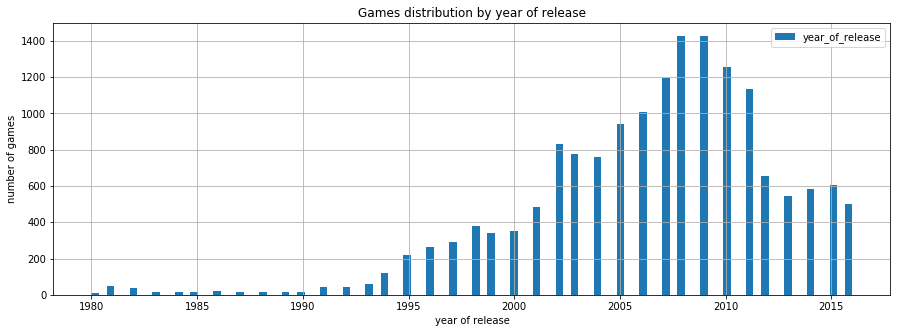

In [20]:
df.plot(kind = 'hist', y = 'year_of_release',bins = 100,\
        range = (1980, 2016), figsize = (15, 5), grid = True)#построим гистограмму
plt.xlabel('year of release') #при помощи метода добавим понятные описания для осей, а также название гистограммы
plt.ylabel('number of games')
plt.title('Games distribution by year of release')

Разработка и выпуск первых видеоигр начинается в 1980-х годах. С развитием технологий ежегодный выпуск видеоигр начинает увеличиваться. Пиковые значения были достигнуты в 2008-2010 гг. Так, ежегодно выпускалось порядка 1200-1400 игр. Однако затем наблюдается отрицательный тренд. Возможная причина: насыщение рынка, переход на мобильные платформы.

### 3.2. Анализ продаж по платформам

Посмотрим, как менялись продажи по платформам. Выберем топ-10 платформ с наибольшими суммарными продажами и построим распределение по годам.

Text(0.5, 1.0, 'Platform sales distribution by year of release')

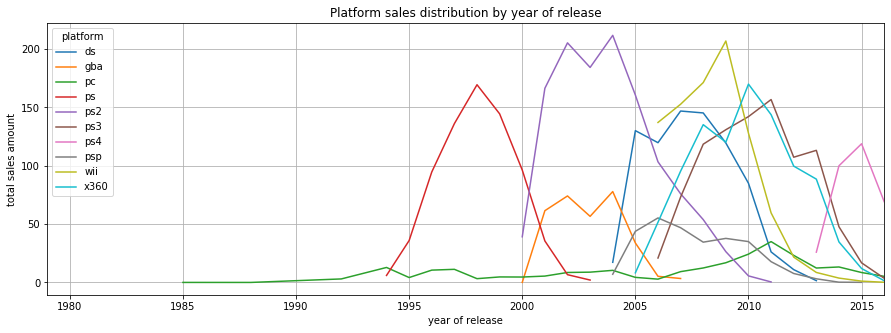

In [21]:
platform_sales_top = df.groupby('platform').agg({'total_sales':'sum'})\
                        .sort_values(by='total_sales').tail(10).index #находим топ-10 платформ по выручке
df.query('platform in @platform_sales_top')\
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(xlim=(1979, 2016), figsize = (15, 5), grid = True) #строим графики
plt.xlabel('year of release') 
plt.ylabel('total sales amount')
plt.title('Platform sales distribution by year of release')

Text(0.5, 1.0, 'Sales distribution by platform')

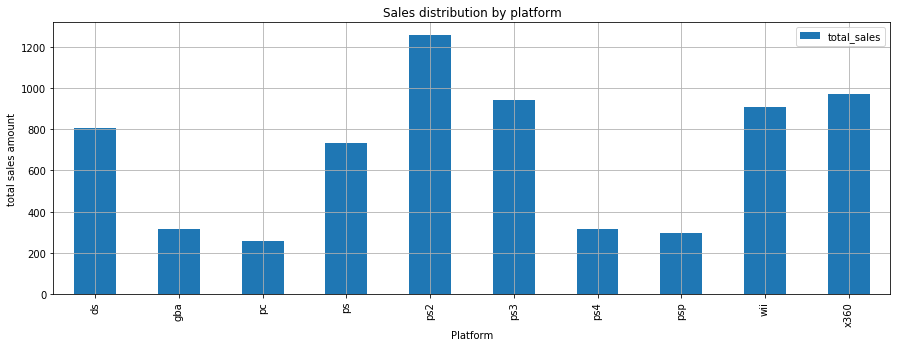

In [22]:
df.query('platform in @platform_sales_top')\
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', xlim=(1979, 2016), figsize = (15, 5), grid = True) #строим гистограмму
plt.xlabel('Platform') 
plt.ylabel('total sales amount')
plt.title('Sales distribution by platform')

По графику видно, что с периодичностью примерно в 5 лет появляются новые платформы, а старые уходят из обращения. Все объясняется потребительскими потребностями в чем-то новом и совершенном. Но видны и исключения. Игры для компьютеров хоть и показывают небольшую по размеру выручку, но зато доход стабилен, потребность со стороны играков не падает. Также стоит отметить платформы от Sony: PlayStation, PlayStation 2, PlayStation 3, PlayStation4 и PlayStation Portable. Каждая из них показывает значительные объемы выручки. А в совокупности Sony занимает 50% из топ-10 платформ с наибольшими суммарными продажами. **Также среди 10-ки лидеров можно выделить платформы от Xbox (Xbox 360) и Nintendo (Nintendo wii).**

### 3.3. Определение актуального периода для анализа

Для целей дальнейшего анализа необходимо определить временной отрезок, на основе которого мы будем планировать прогнозные значения. 

Актуальный период можно выбрать примерно так: выбирается минимальный порог продаж (например, установим порог на уровне 1 млн проданных копий). Для каждой платформы ищется число лет, когда суммарные продажи превышают этот порог. Потом считается среднее число таких лет - это и будет среднее время жизни платформы и актуальный период.

In [23]:
def platform_life(platform_name): #создадим функцию для подсчета кол-ва лет, когда порог продаж превышает установленное значение
    df_platform = df[df['platform'] == platform_name]
    year_of_life = 0
    for year in range(1980, 2016):
        df_platform_year = df_platform[df_platform['year_of_release'] == year]
        total_sales_year = sum(df_platform_year['total_sales'])
        if total_sales_year > 1:
            year_of_life += 1
    return year_of_life

In [24]:
average_platform_life = [] #находим среднее значение лет, подходящих по критерию продаж
for platform_name in df['platform'].unique():
    average_platform_life.append(platform_life(platform_name))
sum(average_platform_life)/len(average_platform_life)

6.129032258064516

Получается, что для целей анализа необходимо отсортировать данные за последние **5 лет**.Это и будет актуальный период для анализа.

In [25]:
df_new = df.query('year_of_release >= 2012 and year_of_release <= 2016') #создаем выборку за актуальный период
df_new.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,2013.916840,0.204771,0.175613,0.066729,0.054109,1244.709286,1046.767117,0.501223
std,1.411766,0.566696,0.505346,0.241575,0.164639,1070.651993,1105.812445,1.249157
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,76.000000,6.900000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,2222.000000,8.500000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,2222.000000,2222.000000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,2222.000000,2222.000000,21.050000


#### 3.3.1. Платформы-лидеры по продажам

Text(0.5, 1.0, 'Platform sales distribution by year of release')

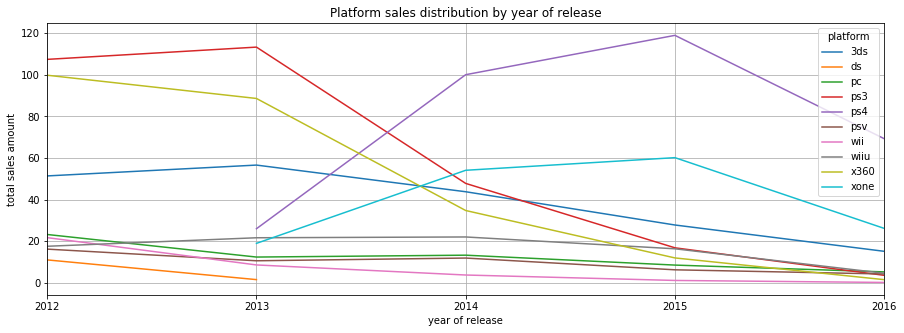

In [26]:
platform_sales_top = df_new.groupby('platform').agg({'total_sales':'sum'})\
                        .sort_values(by='total_sales').tail(10).index #находим топ-10 платформ по выручке
df_new.query('platform in @platform_sales_top')\
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(xticks=df_new['year_of_release'].unique(), xlim=(2012, 2016), figsize = (15, 5), grid = True) #строим графики
plt.xlabel('year of release') 
plt.ylabel('total sales amount')
plt.title('Platform sales distribution by year of release')

За последние 5 лет на рынке наблюдается отрицательный тренд по объему продаж. Более стабильная ситуация у компьютерных игр. Для Sony удельный вес в топ-10  по кол-ву платформ сократился (30%). Значительно выросла доля у Nintendo (30%) и Xbox (20%).

#### 3.3.2. Продажи по платформам

(0, 2)

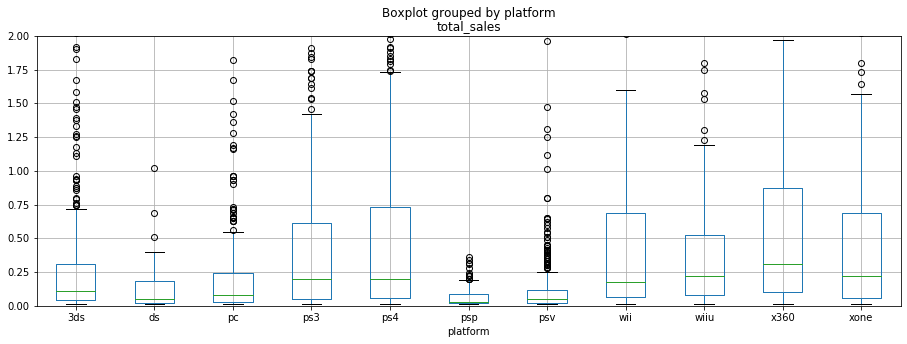

In [27]:
df_new.boxplot('total_sales', by='platform',figsize=(15,5))
plt.ylim(0, 2)

Оценивая глобальные продажи игр в разбивке по платформам, необходимо отметить, что все же наибольшее кол-во игр сейчас выходят на базе Xbox (Xbox 360 и Xbox One), второе место занимает Sony PlayStation (PlayStation 3 и PlayStation 4), третье место достается Nintendo (Nintendo wii и Nintendo wiiu). В среднем объем продаж составляет 0,25 млн, 0,23 млн и 0,2 млн, соответственно.

#### 3.3.3. Зависимость размера продаж от отзывов пользователей и критиков

Рассмотрим, как влияют отзывы пользователей и критиков на размер продаж для лидеров рынка.

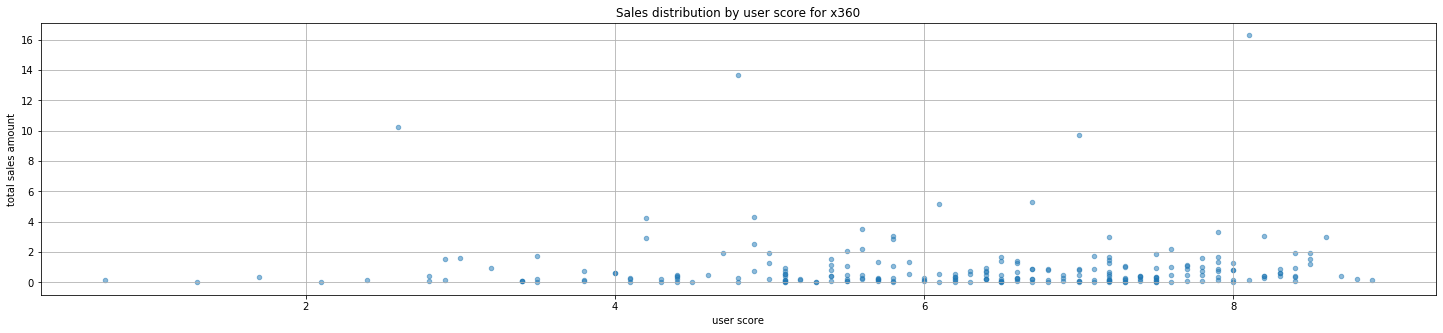

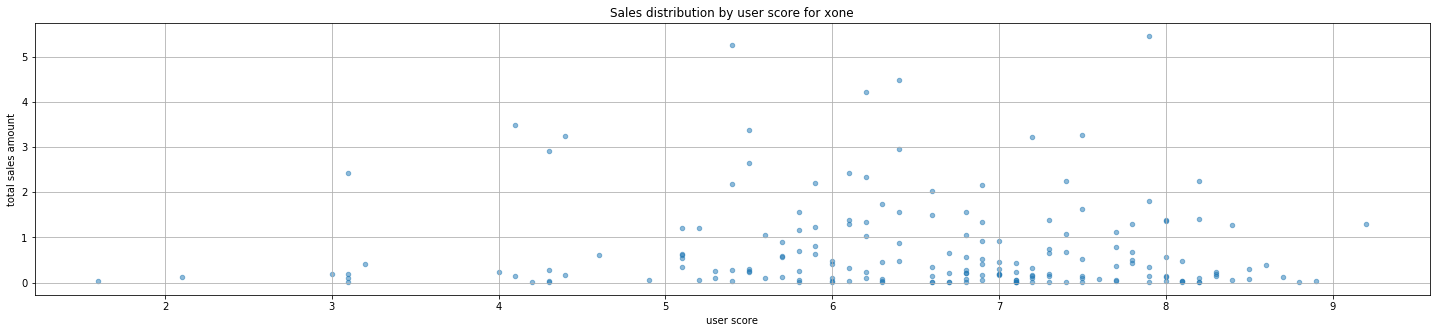

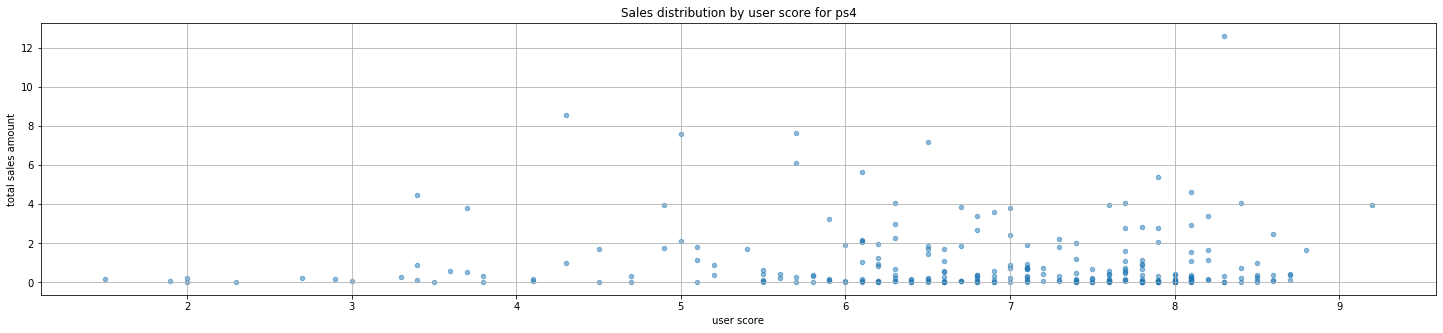

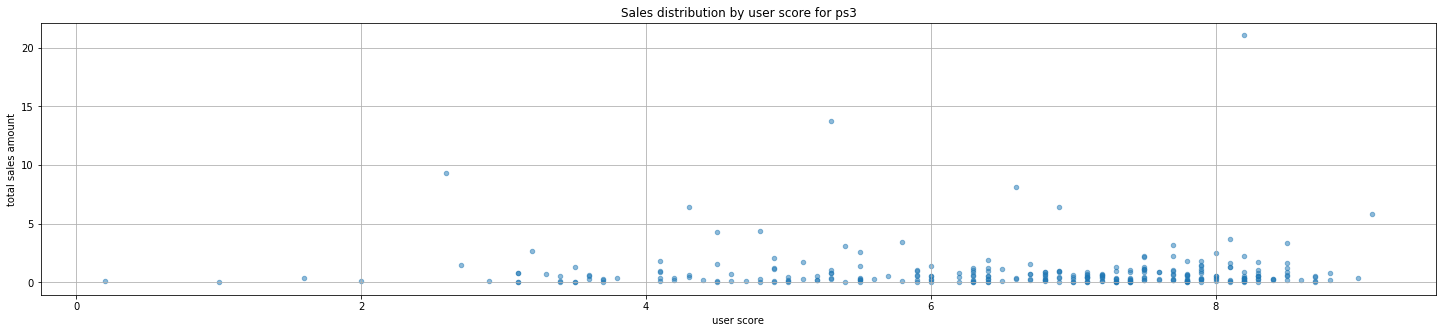

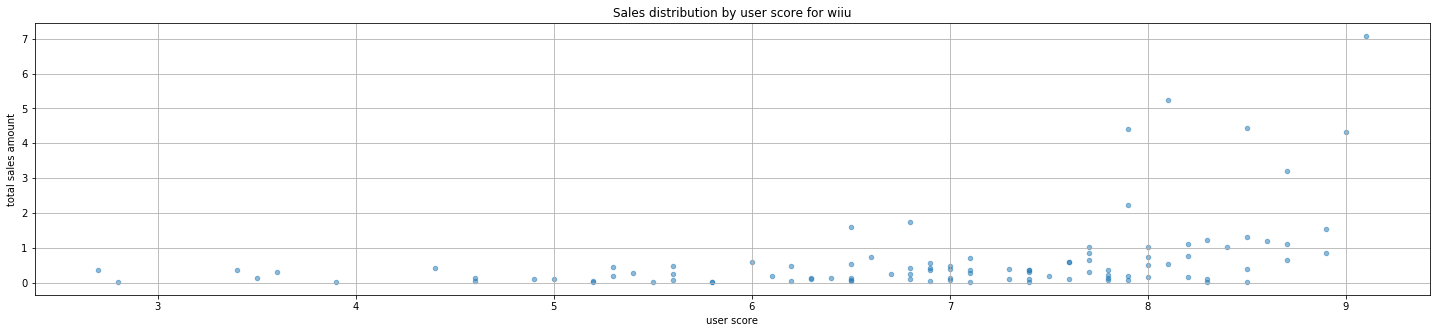

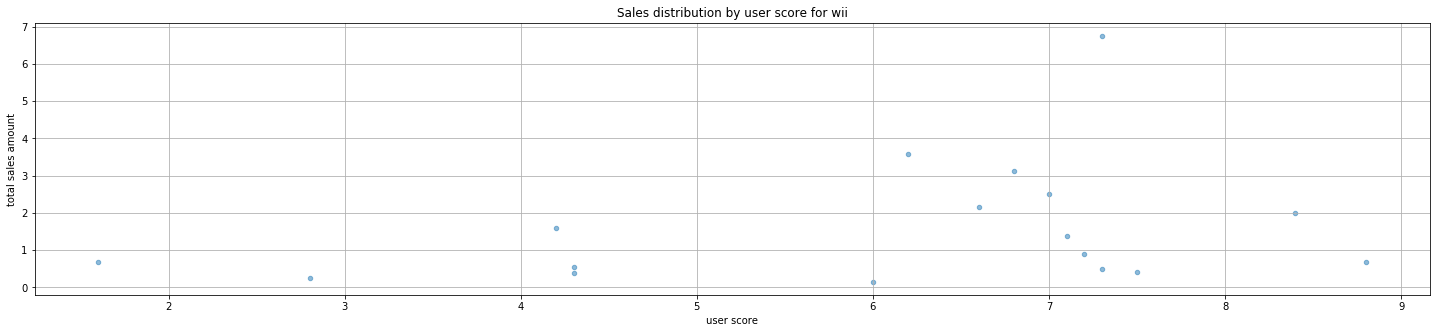

In [28]:
for platform in ['x360', 'xone', 'ps4', 'ps3', 'wiiu', 'wii']:
    df_new[(df_new['platform'] == platform) & (df_new['user_score'] != 2222)].sort_values(by='user_score')\
    .plot(x='user_score', y='total_sales', kind='scatter', figsize=(25,5), grid=True, alpha = 0.5)
    plt.xlabel('user score')
    plt.ylabel('total sales amount')
    plt.title(f'Sales distribution by user score for {platform}') #построим диаграмму рассеяния для лидеров по оценкам играков

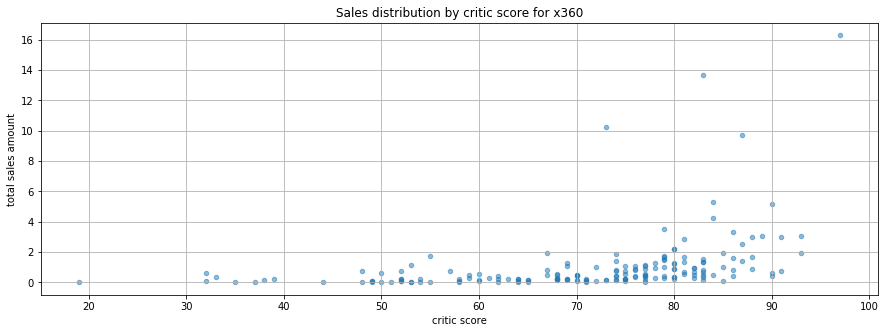

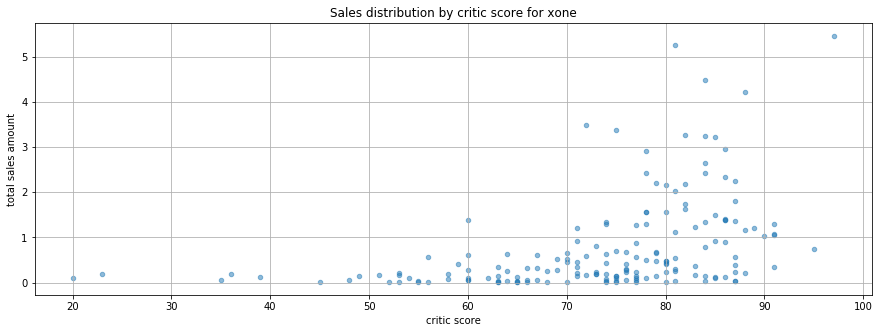

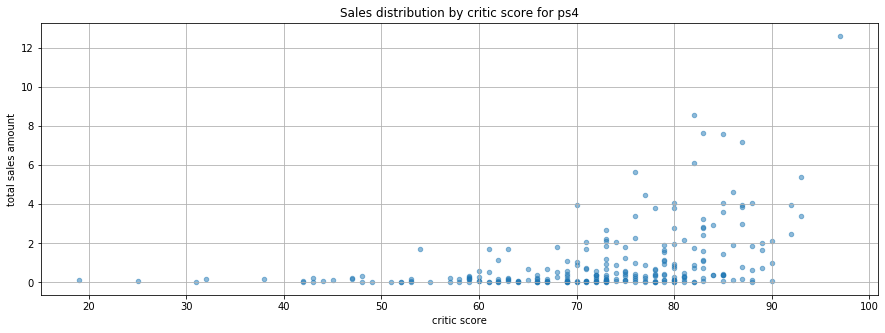

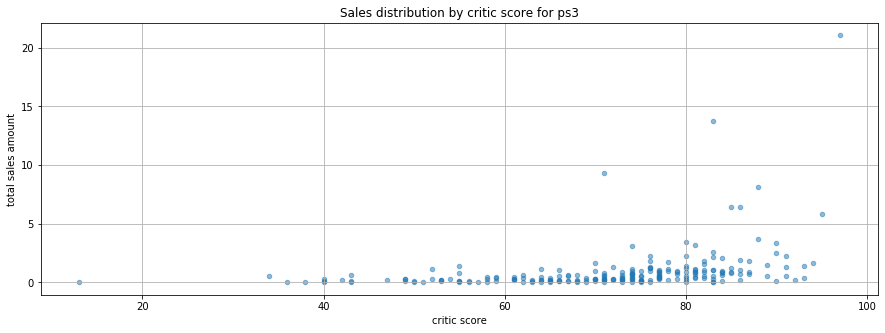

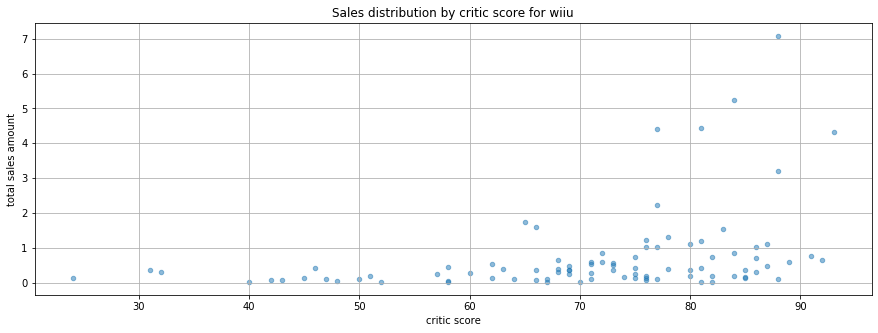

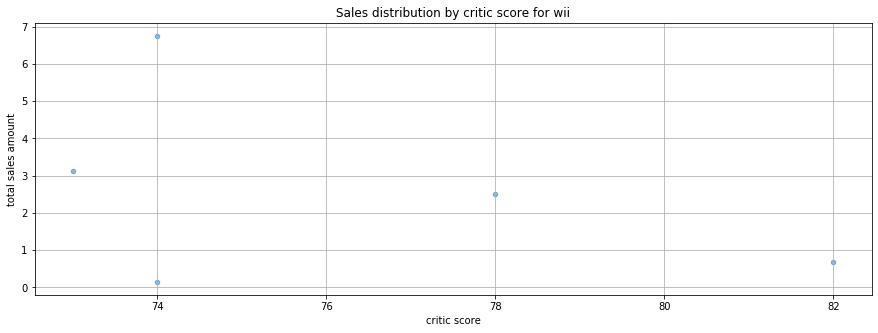

In [29]:
for platform in ['x360', 'xone', 'ps4', 'ps3', 'wiiu', 'wii']:
    df_new[(df_new['platform'] == platform) & (df_new['critic_score'] != 2222)]\
    .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,5), grid=True, alpha = 0.5)
    plt.xlabel('critic score')
    plt.ylabel('total sales amount')
    plt.title(f'Sales distribution by critic score for {platform}')#построим диаграмму рассеяния для лидеров по оценкам критиков

По графикам наблюдается положительный тренд. Это означает, что для более высоких оценок характерен более высокий размер продаж. Иными словами, наблюдается взаимосвязь между переменными. Рассчитаем коэффициент корреляции, чтобы с точностью ответить на вопрос.

Для рассчета коэффициента корреляции подготовим данные и приведем к нужному типу.

In [30]:
df_new_corr = df_new[df_new['critic_score'] != 2222] #очищаем от выбросов
df_new_corr = df_new_corr[df_new_corr['user_score'] != 2222]
df_new_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 16 to 16692
Data columns (total 12 columns):
name               1297 non-null object
platform           1297 non-null object
year_of_release    1297 non-null int64
genre              1297 non-null object
na_sales           1297 non-null float64
eu_sales           1297 non-null float64
jp_sales           1297 non-null float64
other_sales        1297 non-null float64
critic_score       1297 non-null float64
user_score         1297 non-null float64
esrb_rating        1297 non-null object
total_sales        1297 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 131.7+ KB


In [31]:
for platform in ['x360', 'xone', 'ps4', 'ps3', 'wiiu', 'wii']: #считаем коэффициент корреляции
    df_new_corr_platform = df_new_corr[df_new_corr['platform'] == platform]
    corr = df_new_corr_platform[['critic_score',\
                   'user_score',\
                    'total_sales']].corr()
    print(platform)
    print(corr)
    print()

x360
              critic_score  user_score  total_sales
critic_score      1.000000    0.557352     0.360573
user_score        0.557352    1.000000    -0.002014
total_sales       0.360573   -0.002014     1.000000

xone
              critic_score  user_score  total_sales
critic_score      1.000000    0.472462     0.410422
user_score        0.472462    1.000000    -0.094003
total_sales       0.410422   -0.094003     1.000000

ps4
              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.405895
user_score        0.557654    1.000000    -0.033625
total_sales       0.405895   -0.033625     1.000000

ps3
              critic_score  user_score  total_sales
critic_score      1.000000    0.539456     0.331057
user_score        0.539456    1.000000     0.003227
total_sales       0.331057    0.003227     1.000000

wiiu
              critic_score  user_score  total_sales
critic_score      1.000000    0.770080     0.350882
user_score        0.770080    1.00000

Действительно, между объемом продаж и оценкой критиков присутствует прямая зависимость, причем для лидеров это связь сильнее. **Оценки пользователей не влияют на объемы продаж, хотя есть исключения: для платформы Nintendo wiiu их влияние находится на равне с влиянием оценок критиков.**

#### 3.3.4. Распределение игр по жанрам

Text(0.5, 1.0, 'Genre sales distribution by year of release')

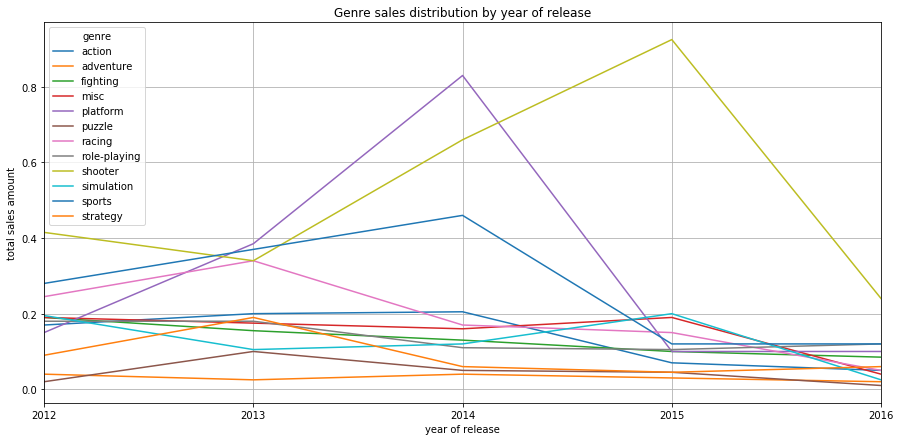

In [32]:
df_new.pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='median')\
    .plot(xticks=df_new['year_of_release'].unique(), figsize = (15, 7), grid = True) #строим графики
plt.xlabel('year of release') 
plt.ylabel('total sales amount')
plt.title('Genre sales distribution by year of release')

**За период 2012-2016 гг. наибольшей популярностью пользуются игры 5 жанров: шутеры, платформеры, экшен и гонки. В 2016 г. с большим отрывом лидером становятся игры-шутеры: именно у них зафиксированы самые высокие медианные продажи по отрасли. Также к числу передовиков можно отнести игры жанра экшен и ролевые игры, платформеры и файтинги. Показывают неплохие результаты по продажам и игры жанра приключения, гонки, спорт, misc, симуляторы, стратегии**. Наименее популярным жанром является игры-пазлы. Отчасти, это может быть связано с рейтингом ESRB, поскольку целевой аудиторией здесь могут являться дети в возрасте от 3 до 6 лет.

## 4. Составление портрета пользователя каждого региона

Чтобы правильно построить рекламную кампанию, нужно знать свою целевую аудиторию, т.е. знать их предпочтения и вкусы. Определим для каждого региона портрет пользователя.

### 4.1. Северная Америка

Text(0.5, 1.0, 'Platform sales distribution by year of release for North America')

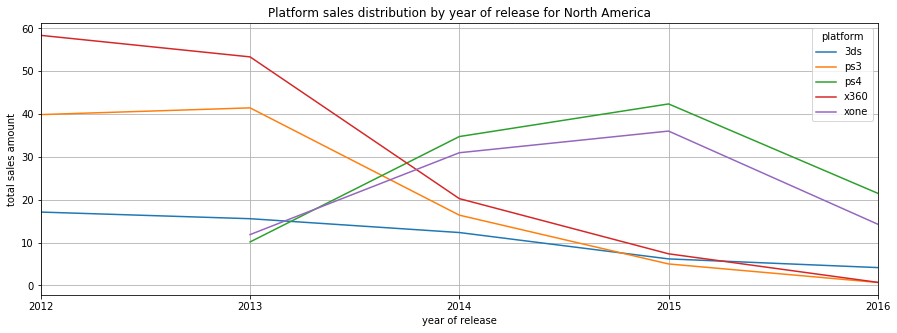

In [33]:
na_platform_sales_top = df_new.groupby('platform').agg({'na_sales':'sum'})\
                        .sort_values(by='na_sales').tail(5).index #находим топ-5 платформ по продажам
df_new.query('platform in @na_platform_sales_top')\
    .pivot_table(index='year_of_release', columns='platform', values='na_sales', aggfunc='sum')\
    .plot(xticks=df_new['year_of_release'].unique(), xlim=(2012, 2016), figsize = (15, 5), grid = True) #строим график
plt.xlabel('year of release') 
plt.ylabel('total sales amount')
plt.title('Platform sales distribution by year of release for North America')

Text(0.5, 1.0, 'Genre sales distribution by year of release for North America')

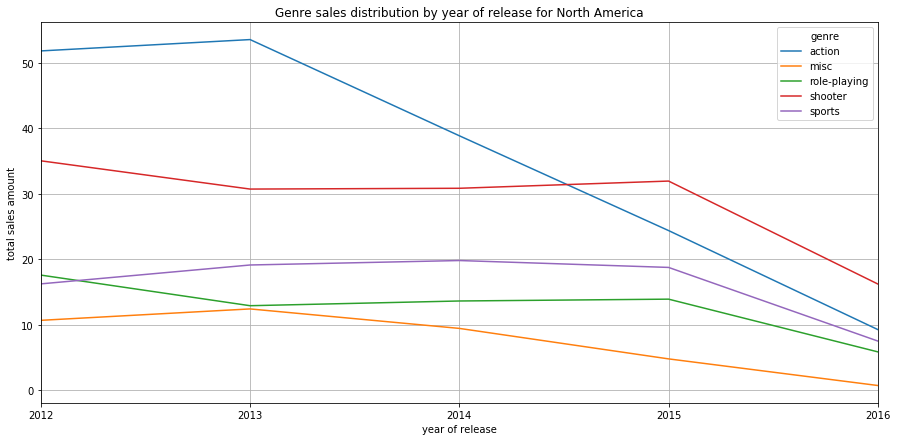

In [34]:
na_genre_sales_top = df_new.groupby('genre').agg({'na_sales':'sum'})\
                        .sort_values(by='na_sales').tail(5).index #находим топ-5 жанров по продажам
df_new.query('genre in @na_genre_sales_top')\
    .pivot_table(index='year_of_release', columns='genre', values='na_sales', aggfunc='sum')\
    .plot(xticks=df_new['year_of_release'].unique(), figsize = (15, 7), grid = True) #строим график
plt.xlabel('year of release') 
plt.ylabel('total sales amount')
plt.title('Genre sales distribution by year of release for North America')

(0, 2)

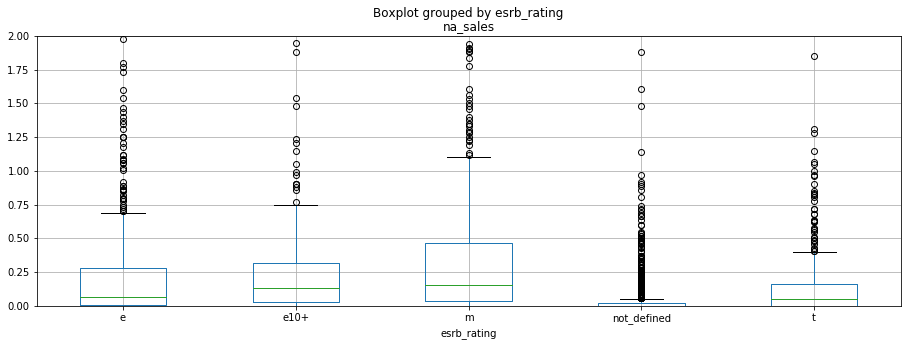

In [35]:
df_new.boxplot('na_sales', by='esrb_rating',figsize=(15,5)) #находим связь между продажами и рейтингов ESRB
plt.ylim(0, 2)

**Портрет пользователя для Северной Америки:**
1. Предпочтительные платформы для игр:
 1. PlayStation 4
 2. Xbox One
 3. Nintendo 3DS
 4. PlayStation 3
 5. Xbox 360
2. Предпочтительные жанры для игр:
 1. шутер
 2. экшен
 3. спорт
 4. ролевые
 5. misc
3. Предпочтительные возрастные ограничения согласно ESRB:
 1. Для детей младшего возраста (EC)
 2. Для всех от 10 лет и старше (E10+)
 3. Для взрослых (M)
 4. Подросткам (T)
 5. Для всех (E)

### 4.2. Европа

Text(0.5, 1.0, 'Platform sales distribution by year of release for Europe')

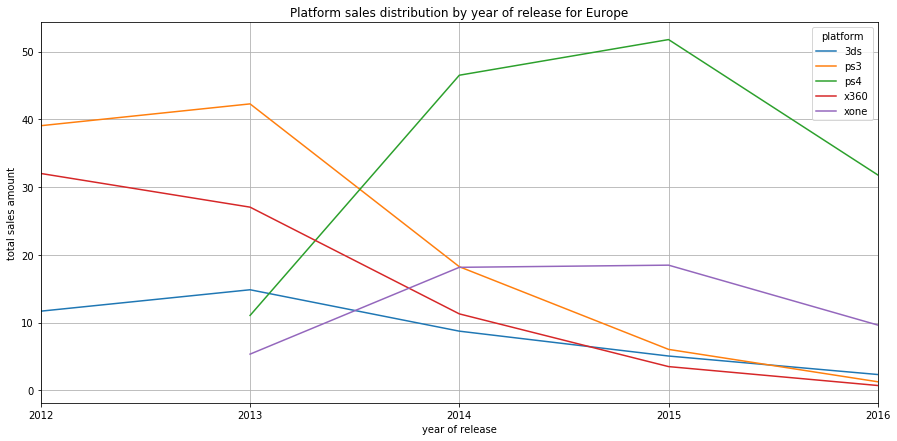

In [36]:
eu_platform_sales_top = df_new.groupby('platform').agg({'eu_sales':'sum'})\
                        .sort_values(by='eu_sales').tail(5).index #находим топ-5 платформ по продажам
df_new.query('platform in @eu_platform_sales_top')\
    .pivot_table(index='year_of_release', columns='platform', values='eu_sales', aggfunc='sum')\
    .plot(xticks=df_new['year_of_release'].unique(), xlim=(2012, 2016), figsize = (15, 7), grid = True) #строим график
plt.xlabel('year of release') 
plt.ylabel('total sales amount')
plt.title('Platform sales distribution by year of release for Europe')

Text(0.5, 1.0, 'Genre sales distribution by year of release for Europe')

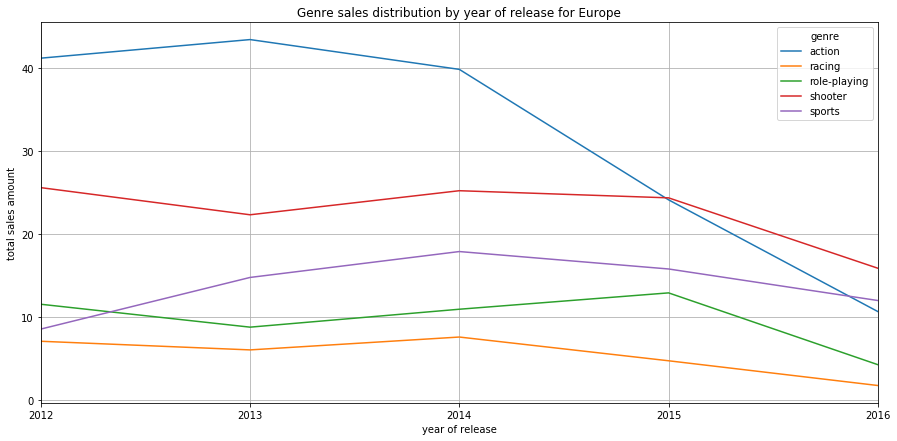

In [37]:
eu_genre_sales_top = df_new.groupby('genre').agg({'eu_sales':'sum'})\
                        .sort_values(by='eu_sales').tail(5).index #находим топ-5 жанров по продажам
df_new.query('genre in @eu_genre_sales_top')\
    .pivot_table(index='year_of_release', columns='genre', values='eu_sales', aggfunc='sum')\
    .plot(xticks=df_new['year_of_release'].unique(), figsize = (15, 7), grid = True) #строим график
plt.xlabel('year of release') 
plt.ylabel('total sales amount')
plt.title('Genre sales distribution by year of release for Europe')

(0, 2)

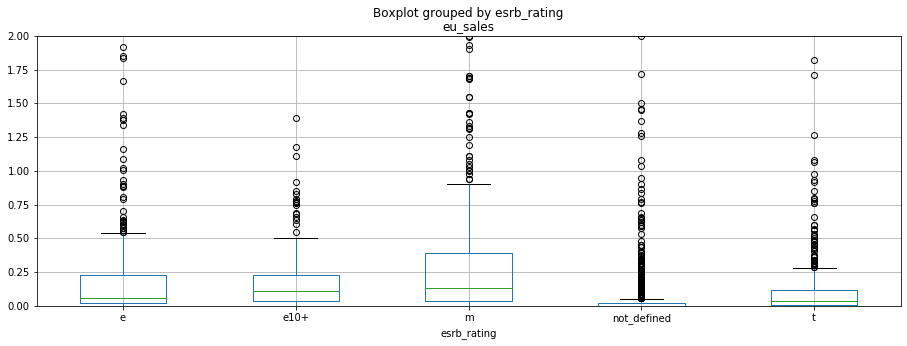

In [38]:
df_new.boxplot('eu_sales', by='esrb_rating',figsize=(15,5))
plt.ylim(0, 2)

**Портрет пользователя для Европы:**
1. Предпочтительные платформы для игр:
 1. PlayStation 4 (несомненный лидер на рынке)
 2. PC
 3. Nintendo 3DS
 4. PlayStation 3
 5. Xbox 360
2. Предпочтительные жанры для игр:
 1. шутер
 2. спорт 
 3. эшкен
 4. ролевые
 5. гонки
3. Предпочтительные возрастные ограничения согласно ESRB:
 1. Для взрослых (M)
 2. Для всех от 10 лет и старше (E10+)
 3. Подросткам (T)
 4. Для всех (E) 

### 4.3. Япония

Text(0.5, 1.0, 'Platform sales distribution by year of release for Japan')

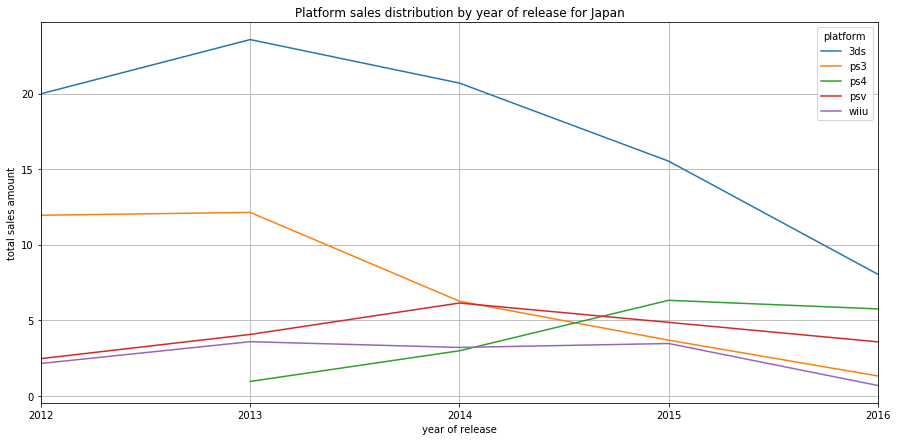

In [39]:
jp_platform_sales_top = df_new.groupby('platform').agg({'jp_sales':'sum'})\
                        .sort_values(by='jp_sales').tail(5).index #находим топ-5 платформ по продажам
df_new.query('platform in @jp_platform_sales_top')\
    .pivot_table(index='year_of_release', columns='platform', values='jp_sales', aggfunc='sum')\
    .plot(xticks=df_new['year_of_release'].unique(), xlim=(2012, 2016), figsize = (15, 7), grid = True) #строим график
plt.xlabel('year of release') 
plt.ylabel('total sales amount')
plt.title('Platform sales distribution by year of release for Japan')

Text(0.5, 1.0, 'Genre sales distribution by year of release for Japan')

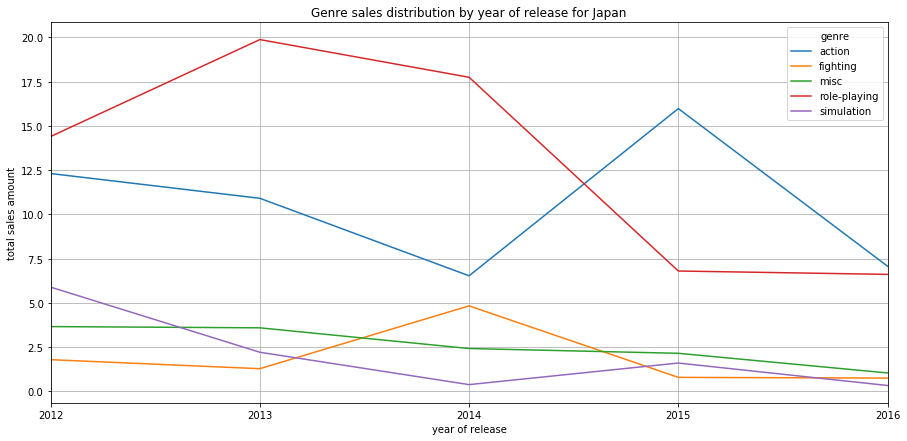

In [40]:
jp_genre_sales_top = df_new.groupby('genre').agg({'jp_sales':'sum'})\
                        .sort_values(by='jp_sales').tail(5).index #находим топ-5 жанров по продажам
df_new.query('genre in @jp_genre_sales_top')\
    .pivot_table(index='year_of_release', columns='genre', values='jp_sales', aggfunc='sum')\
    .plot(xticks=df_new['year_of_release'].unique(), figsize = (15, 7), grid = True) #строим график
plt.xlabel('year of release') 
plt.ylabel('total sales amount')
plt.title('Genre sales distribution by year of release for Japan')

(0, 0.2)

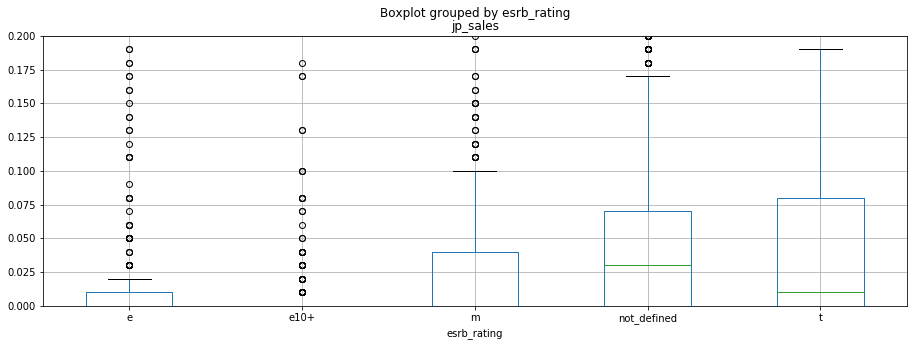

In [41]:
df_new.boxplot('jp_sales', by='esrb_rating',figsize=(15,5))
plt.ylim(0, 0.2)

**Портрет пользователя для Японии:**
1. Предпочтительные платформы для игр:
 1. Nintendo 3DS
 2. PlayStation 4
 3. PlayStation Vita
 4. PlayStation 3
2. Предпочтительные жанры для игр:
 1. эшкен
 2. ролевые 
 3. misc
 4. файтинг
 5. платформеры
3. Предпочтительные возрастные ограничения согласно ESRB:
 1. Для взрослых (M)
 2. Подросткам (T)

## 5. Проверка гипотез

В рамках анализа необходимо проверить 2 гипотизы касательно пользовательских рейтингов.

Проверку гипотез будем производить при помощи t-тестов, поскольку выборки для гипотез предсавляют собой независимые массивы данных.

Установим критический уровень статистической значимости в размере 5%.

In [42]:
alpha = .05

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Предположим, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Так,

H0: средние пользовательские рейтинги платформ Xbox One и PC не различаются

H1: средние пользовательские рейтинги платформ Xbox One и PC различается

In [43]:
xone = df_new_corr[df_new_corr['platform'] == 'xone'] #формируем выборку по платформе
pc = df_new_corr[df_new_corr['platform'] == 'pc']
xone = xone['user_score'] #формируем массив по рейтингу
pc = pc['user_score']

In [44]:
results = st.ttest_ind(xone, pc) #используем метод для 2хнезависимых выборок
print('p-value:', results.pvalue) #выводим уровень значимости 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.5991315923632393
Не получилось отвергнуть нулевую гипотезу


#### Вывод

По наблюдаемым данным нельзя отвергнуть предположение, что средние пользовательские рейтинги платформ Xbox One и PC не различаются.

### Средние пользовательские рейтинги жанров экшен и спорт разные

Предположим, что средние пользовательские рейтинги жанров экшен и спорт разные. Так,

H0: средние пользовательские рейтинги жанров экшен и спорт не различаются

H1: средние пользовательские рейтинги жанров экшен и спорт различаются

In [45]:
action = df_new_corr[df_new_corr['genre'] == 'action'] #формируем выборку по жанру
sports = df_new_corr[df_new_corr['genre'] == 'sports']
action = action['user_score'] #формируем массив по рейтингу
sports = sports['user_score']

In [46]:
results = st.ttest_ind(action, sports) #используем метод для 2хнезависимых выборок
print('p-value:', results.pvalue) #выводим уровень значимости 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 9.13633279873618e-16
Отвергаем нулевую гипотезу


#### Вывод

По наблюдаемым данным можно предположить, что средние пользовательские рейтинги жанров экшен и спорт различаются.

## Общий вывод

Таким образом, был проведен **анализ данных рынка видеоигр** для **интернет-магазина «Стримчик»**, который продаёт по всему миру компьютерные игры. Данные были получены из открытых источников, что объясняет частичные пропуски в значениях. 

Разработка и выпуск первых видеоигр начинается в 1980-х годах. С развитием технологий ежегодный выпуск видеоигр начинает увеличиваться. Пиковые значения были достигнуты в 2008-2010 гг. Так, ежегодно выпускалось порядка 1200-1400 игр. Однако затем наблюдается отрицательный тренд. Возможная причина: насыщение рынка, переход на мобильные платформы.

С периодичностью примерно в 5 лет появляются новые платформы, а старые уходят из обращения. Все объясняется потребительскими потребностями в чем-то новом и совершенном. Но видны и исключения. Игры для компьютеров хоть и показывают небольшую по размеру выручку, но зато доход стабилен, потребность со стороны играков не падает. Также стоит отметить платформы от Sony: PlayStation, PlayStation 2, PlayStation 3, PlayStation4 и PlayStation Portable. Каждая из них показывает значительные объемы выручки. А в совокупности Sony занимает 50% из топ-10 платформ с наибольшими суммарными продажами.

В рамках анализа необходимо было определить средний жизненный цикл платформ и, исходя из этого, обозначить временной интервал для анализа и построения прогнозов. 

Принцип определения жизненного цикла платформ: выбирается минимальный порог продаж (например, установим порог на уровне 1 млн проданных копий). Для каждой платформы ищется число лет, когда суммарные продажи превышают этот порог. Потом считается среднее число таких лет - это и будет среднее время жизни платформы и актуальный период.

В результате рассчета было получено среднее число лет жизни платформы - 6 лет. **Актуальный период для исследования установлен в пределах 2011 - 2016 гг.**

**Ситуация на рынке игр на данный момент следующая:**

- За последние 6 лет на рынке наблюдается отрицательный тренд по объему продаж. Более стабильная ситуация у компьютерных игр. Для Sony удельный вес в топ-10 по кол-ву платформ сократился (30%). Значительно выросла доля у Nintendo (30%) и Xbox (20%).
- Оценивая глобальные продажи игр в разбивке по платформам, необходимо отметить, что все же наибольшее кол-во игр сейчас выходят на базе Xbox (Xbox 360 и Xbox One), второе место занимает Sony PlayStation (PlayStation 3 и PlayStation 4), третье место достается Nintendo (Nintendo wii и Nintendo wiiu). В среднем объем продаж составляет 0,25 млн, 0,23 млн и 0,2 млн, соответственно.
- Между объемом продаж и оценкой критиков присутствует прямая зависимость, причем для лидеров это связь сильнее. Оценки пользователей влияют в наименьшей степени на объемы продаж, хотя для некоторых платформ их влияние находится на равне с влиянием оценок критиков (Nintendo wiiu и Nintendo wii).
- За период 2011-2016 гг. наибольшей популярностью пользуются игры в жанре экшен. В 2016 г. лидером становятся игры-шутеры. Также к числу передовиков можно отнести игры жанра спорт и релевые игры. Эти 4 жанра в совокупности составляют около 80% всего игрового рынка. Наименее популярным жанром является игры-пазлы. Отчасти, это может быть связано с рейтингом ESRB, поскольку целевой аудиторией здесь могут являться дети в возрасте от 3 до 6 лет.

В рамках анализа необходимо было проверить **2 гипотизы касательно пользовательских рейтингов**.

По наблюдаемым данным нельзя отвергнуть предположение, что средние пользовательские рейтинги платформ Xbox One и PC не различаются.

По наблюдаемым данным можно предположить, что средние пользовательские рейтинги жанров экшен и спорт не различается.

### Рекомендации

Для того чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год рекомендуется брать во внимание разработанные в процессе анализа портреты пользователей.

**Портрет пользователя для Северной Америки:**
1. Предпочтительные платформы для игр:
 1. PlayStation 4
 2. Xbox One
 3. Nintendo 3DS
 4. PlayStation 3
 5. Xbox 360
2. Предпочтительные жанры для игр:
 1. шутер
 2. экшен
 3. спорт
 4. ролевые
 5. misc
3. Предпочтительные возрастные ограничения согласно ESRB:
 1. Для детей младшего возраста (EC)
 2. Для всех от 10 лет и старше (E10+)
 3. Для взрослых (M)
 4. Подросткам (T)
 5. Для всех (E)
 
**Портрет пользователя для Европы:**
1. Предпочтительные платформы для игр:
 1. PlayStation 4 (несомненный лидер на рынке)
 2. PC
 3. Nintendo 3DS
 4. PlayStation 3
 5. Xbox 360
2. Предпочтительные жанры для игр:
 1. шутер
 2. спорт 
 3. эшкен
 4. ролевые
 5. гонки
3. Предпочтительные возрастные ограничения согласно ESRB:
 1. Для взрослых (M)
 2. Для всех от 10 лет и старше (E10+)
 3. Подросткам (T)
 4. Для всех (E) 
 
**Портрет пользователя для Японии:**
1. Предпочтительные платформы для игр:
 1. Nintendo 3DS
 2. PlayStation 4
 3. PlayStation Vita
 4. PlayStation 3
2. Предпочтительные жанры для игр:
 1. эшкен
 2. ролевые 
 3. misc
 4. файтинг
 5. платформеры
3. Предпочтительные возрастные ограничения согласно ESRB:
 1. Для взрослых (M)
 2. Подросткам (T)